# W10 Lab Assignment

Dive deeper into high dimensional data.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
sns.set_style('white')

Load the iris dataset.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can use the [**`PairGrid()`**](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) function to create a grid of subplots to plot relations between pairs of variables. On the diagonal of the grid, we plot the KDE of each variable using the **`map_diag()`** method. And on the off-diagonal subplots, we plot 2-D KDE of pairs of variables using the **`map_offdiag()`** method.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


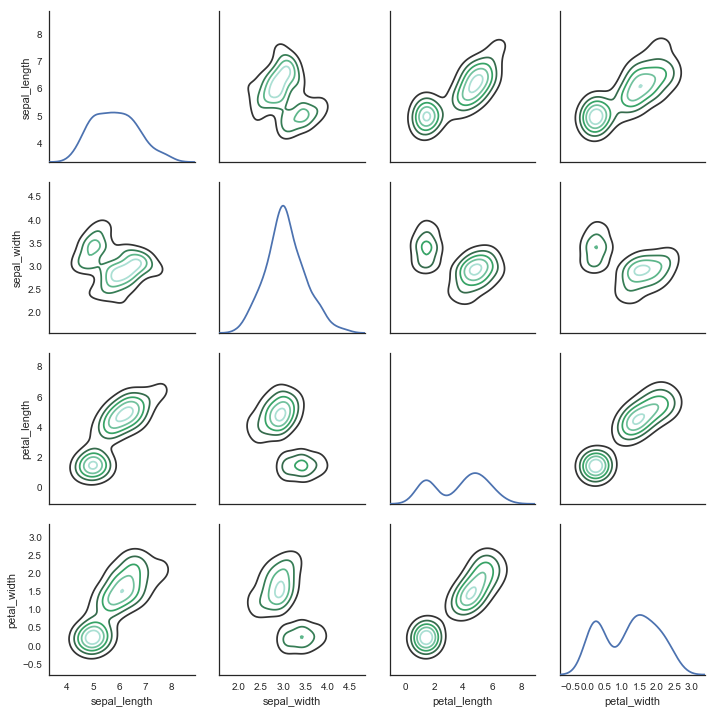

In [3]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=5) # set the number of contour levels to 5

**TODO**: Use [**`PairGrid()`**](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) to plot KDE on the diagonal; on the lower diagonal subplots, plot scatter plot between two variables; on the upper diagonal subplots, plot 2-D KDE of two variables.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


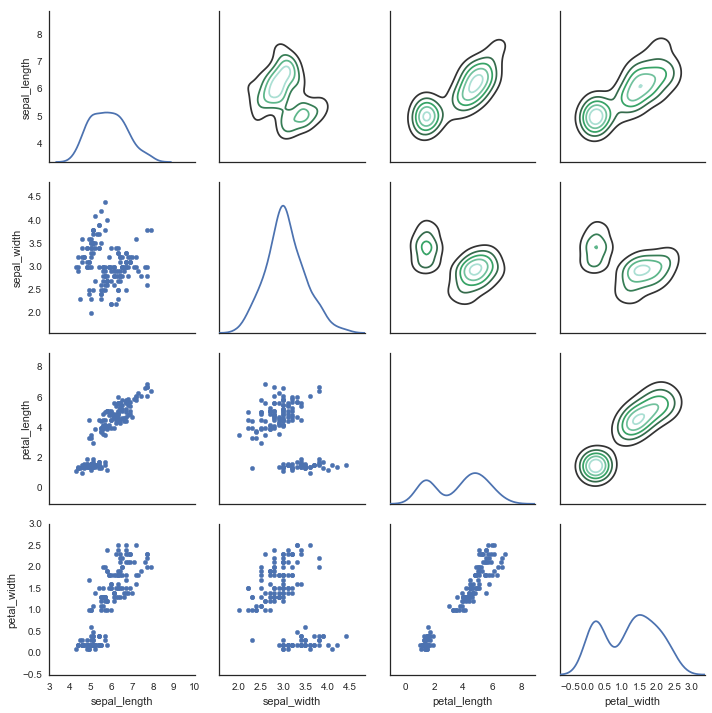

In [4]:
# TODO: on the diagonal: KDE; lower diagonal: scatter plot; upper diagonal: 2-D KDE; set the number of contour levels to 5
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter)
g.map_upper(sns.kdeplot, n_levels=5) 

## Parallel coordinates

Can be easily created using the [**`parallel_coordinates()`**](http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates) function in pandas.

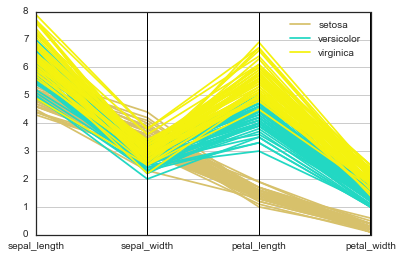

In [5]:
# TODO: draw the parallel coordinates plot with the iris data, and let it use different colors for each iris species. 
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'species')

## PCA

We will be working on an image dataset called the [Olivetti faces dataset](http://scikit-learn.org/stable/datasets/olivetti_faces.html), which contains a lot of *faces*. Download the data using the [**`fetch_olivetti_faces()`**](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html) function.

In [6]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to C:\Users\user\scikit_learn_data


Get the data:

In [7]:
faces = dataset.data

In [8]:
n_samples, n_features = faces.shape
print(n_samples)
print(n_features)

400
4096


So, this dataset contains 400 faces, and each of them has 4096 features (=pixels). Let's look at the first face:

In [9]:
faces[0]

array([ 0.66942149,  0.63636363,  0.64876032, ...,  0.08677686,
        0.08264463,  0.07438017], dtype=float32)

It's an one-dimensional array with 4096 numbers. Actually, it is a two-dimensional picture. Use `numpy`'s [**`reshape()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) function as well as `matplotlib`'s [**`imshow()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function, transform this one-dimensional array into an appropriate 2-D matrix and draw it to show the face. You probably want to use `plt.cm.gray` as colormap. 

Be sure to play with different shapes (e.g. 2 x 2048, 1024 x 4, 128 x 32, and so on) and think about why they look like what they look like. What is the right shape of the matrix?

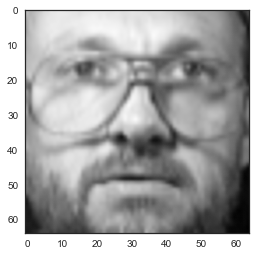

In [10]:
# TODO: draw faces[0] with various shapes and think about it. Show the correct face. 
image_shape = (64, 64)
faces[0].reshape(image_shape)
plt.imshow( faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian' )

Let's perform PCA on this dataset.

In [11]:
from sklearn.decomposition import PCA

Set the number of components to 6:

In [12]:
n_components=6
pca = PCA(n_components=n_components)

Fit the faces data:

In [13]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA has an attribute called `components_`. It is a $\text{n_components} \times \text{n_features}$ matrix, in our case $6 \times 4096$. Each row is a component.

In [14]:
pca.components_

array([[-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
         0.00337966,  0.00318826],
       [-0.02859139, -0.03328836, -0.0378465 , ...,  0.02962783,
         0.02721299,  0.02488899],
       [ 0.0013569 , -0.0003258 , -0.00019799, ..., -0.01541366,
        -0.01370979, -0.01188342],
       [ 0.00112447, -0.00179018, -0.01168214, ...,  0.02943011,
         0.02781931,  0.02521864],
       [-0.02384412, -0.02359268, -0.02216302, ..., -0.04244245,
        -0.04007779, -0.04110621],
       [ 0.02909985,  0.03130351,  0.02877541, ..., -0.01636253,
        -0.01637811, -0.01491268]])

In [15]:
pca.components_.shape

(6, 4096)

We can display the 6 components as images:

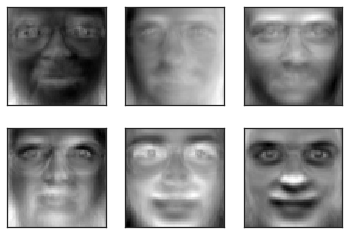

In [16]:
for i, comp in enumerate(pca.components_, 1):
    plt.subplot(2, 3, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

This means by adding up these 6 images, we can get a close approximation of the 400 images in the dataset. 

We can get the coordinates of the 6 components to understand how each face is composed with the components.

In [17]:
faces_r = pca.transform(faces)

In [18]:
faces_r.shape

(400, 6)

`faces_r` is a $400 \times 6$ matrix. Each row corresponds to one face, containing the coordinates of the 6 components. For instance, the coordinates for the first face is

In [19]:
faces_r[0]

array([ 0.81579522, -4.14403414,  2.48326511, -0.90308707,  0.8314133 ,
        0.88629781])

It seems that the second component (with coordinate 4.14403343) contributes the most to the first face. Let's display them together and see how similar they are:

([], <a list of 0 Text yticklabel objects>)

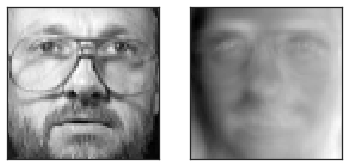

In [20]:
# display the first face image 
plt.subplot(1, 2, 1)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
plt.xticks(())
plt.yticks(())

# display the second component
plt.subplot(1, 2, 2)
plt.imshow(pca.components_[1].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
plt.xticks(())
plt.yticks(())

We can display the composition of faces in an "equation" style:

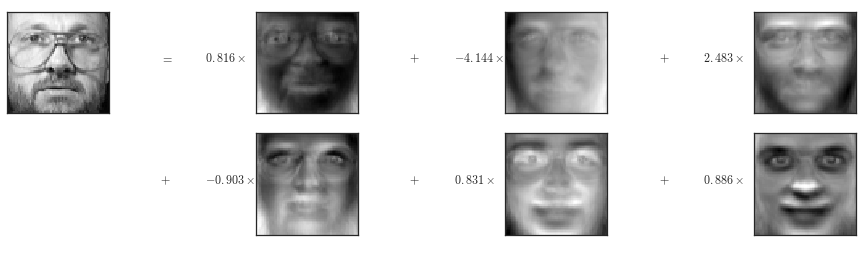

In [21]:
from matplotlib import gridspec

def display_image(ax, image):
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_xticks(())
    ax.set_yticks(())

def display_text(ax, text):
    ax.text(.5, .5, text, size=12)
    ax.axis('off')

face_idx = 0

plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(2, 10, width_ratios=[5,1,1,5,1,1,5,1,1,5])

# display the face
ax = plt.subplot(gs[0])
display_image(ax, faces[face_idx].reshape(image_shape))

# display the equal sign
ax = plt.subplot(gs[1])
display_text(ax, r'$=$')

# display the 6 coordinates
for coord_i, gs_i in enumerate( [2,5,8,12,15,18] ):
    ax = plt.subplot(gs[gs_i])
    display_text( ax, r'$%.3f \times $' % faces_r[face_idx][coord_i] )

# display the 6 components
for comp_i, gs_i in enumerate( [3,6,9,13,16,19] ):
    ax = plt.subplot(gs[gs_i])
    display_image( ax, pca.components_[comp_i].reshape(image_shape) )

# display the plus sign
for gs_i in [4,7,11,14,17]:
    ax = plt.subplot(gs[gs_i])
    display_text(ax, r'$+$')

We can directly see the results of this addition. 

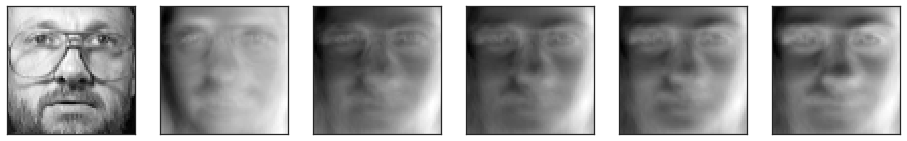

In [22]:
f, axes = plt.subplots(1, 6, figsize=(16,4))
constructed_faces = [-0.816*pca.components_[0] + 4.144*pca.components_[1],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3] + 0.831*pca.components_[4],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3] + 0.831*pca.components_[4] -0.886*pca.components_[5],
                    ]

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))

It becomes more and more real, although quite far with only several components. 

We can also look at the "extreme" faces. First, let's see how the faces are distributed in the two most important dimensions (PC1 and PC2)

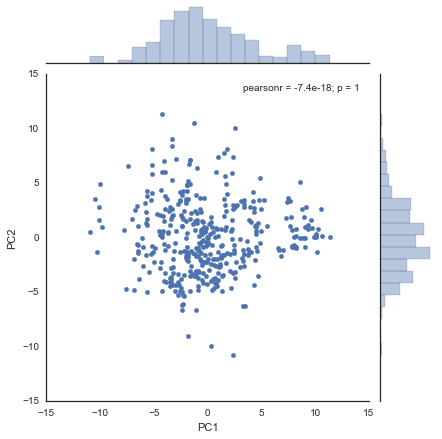

In [23]:
sns.jointplot(x = faces_r[:, 0], y = faces_r[:, 1]).set_axis_labels("PC1", "PC2")

Let's display the face that has the largest and smallest PC1 value. [**`np.argmax()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) finds the maximum value in a vector, but returns the index of it, not the value itself. 

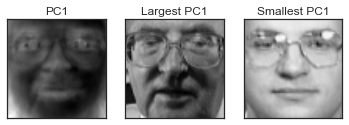

In [24]:
def pc_faces(pc=1):
    idx = pc-1
    plt.subplot(1, 3, 1)
    plt.title("PC{}".format(pc))
    plt.imshow(pca.components_[idx].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    plt.subplot(1, 3, 2)
    plt.title("Largest PC{}".format(pc))
    plt.imshow(faces[np.argmax(faces_r[:, idx])].reshape(64,64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    plt.subplot(1,3,3)
    plt.title("Smallest PC{}".format(pc))
    plt.imshow(faces[np.argmin(faces_r[:, idx])].reshape(64,64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

pc_faces(pc=1)

Ok. Maybe this is saying that the glasses are one of the strongest feature in human faces. ;)

Why are they kinda similar? The 'largest' face is closest to the PC1 face, while the 'smallest' face is closest to the **inverted** PC1 (it's dark). We can do the same thing with PC2. 

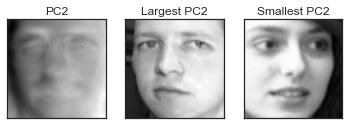

In [25]:
pc_faces(2)

What does this mean? Maybe this axis captures slightly tilted faces? How about PC3?

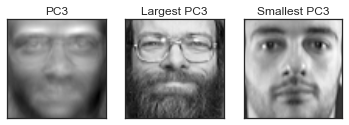

In [26]:
pc_faces(3)

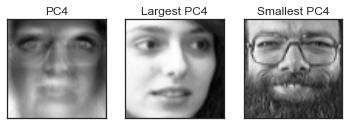

In [27]:
pc_faces(4)

feminine vs. masculine?

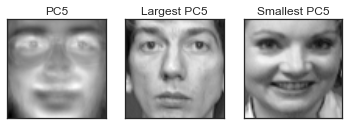

In [28]:
pc_faces(5)

Smiling?

We can also look at the face that is closest to the origin (most avg face?). [**`np.linalg.norm()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) calculates the "norm" (size) of a vector or a matrix. By specifying `axis` we can calculate the norm of each row vector. 

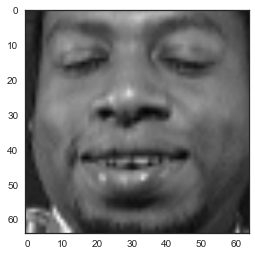

In [29]:
most_avg_face = faces[ np.argmin(np.linalg.norm(faces, axis=1)) ]
plt.imshow(most_avg_face.reshape(image_shape), cmap=plt.cm.gray)